In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

import torch
from torch_geometric.data import Data

In [2]:
target_list = ['erbB4', 'egfr', 'met', 'alk', 'erbB2', 'ret', 'ros1']

def count_taskDataset(df, target_list):
    tk_df = pd.DataFrame()
    result = pd.DataFrame(index=[0], columns=target_list)
    result['total'] = df.shape[0]
    print('total data: '+str(df.shape[0]))
    for tar in target_list:
        tar_df = df.dropna(subset=['pIC50_'+tar])
        tar_df = tar_df[['SMILES_NS','pIC50_'+tar]]
        tar_df.rename(columns={'pIC50_'+tar:'pIC50'},inplace=True)
        tar_df['target'] = tar
        tk_df = pd.concat([tk_df, tar_df],axis=0)
        result[tar] = tar_df.shape[0]
        print(tar+' data: '+str(tar_df.shape[0]))
    tk_df.sort_index(inplace=True)
    return result, tk_df

In [3]:
csv_file = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/7TKs_ic50_chembl+bindingdb.csv'
raw_df = pd.read_csv(csv_file, index_col=0)
print(raw_df.shape)
_,tk = count_taskDataset(raw_df, target_list)
tk.reset_index(drop=True, inplace=True)

(16345, 8)
total data: 16345
erbB4 data: 196
egfr data: 7427
met data: 3618
alk data: 1871
erbB2 data: 2313
ret data: 2985
ros1 data: 151


In [4]:
AC_df = pd.read_csv('/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/7TKs_pIC50/train-intest_fromAC_updated.csv', index_col=0)
_,AC_tk = count_taskDataset(AC_df, target_list)

total data: 11116
erbB4 data: 163
egfr data: 4426
met data: 2430
alk data: 1313
erbB2 data: 1717
ret data: 2332
ros1 data: 131


In [5]:
mt_data = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/multi_task'

mt_tint = pd.read_csv(mt_data+'/train-intest.csv',index_col=0)
print('Multi-task Train-intest Data',mt_tint.shape)
_,tk_tint = count_taskDataset(mt_tint, target_list)

mt_train = pd.read_csv(mt_data+'/train.csv',index_col=0)
print('Multi-task Training Data',mt_train.shape)
_,tk_train = count_taskDataset(mt_train, target_list)

mt_intest = pd.read_csv(mt_data+'/internal-test.csv',index_col=0)
print('Multi-task Internal-test Data',mt_intest.shape)
_,tk_intest = count_taskDataset(mt_intest, target_list)

mt_extest = pd.read_csv(mt_data+'/external-test.csv',index_col=0)
print('Multi-task External-test Data',mt_extest.shape)
_,tk_extest = count_taskDataset(mt_extest, target_list)

Multi-task Train-intest Data (11116, 9)
total data: 11116
erbB4 data: 163
egfr data: 4426
met data: 2430
alk data: 1313
erbB2 data: 1717
ret data: 2332
ros1 data: 131
Multi-task Training Data (10005, 9)
total data: 10005
erbB4 data: 147
egfr data: 3987
met data: 2191
alk data: 1182
erbB2 data: 1543
ret data: 2099
ros1 data: 118
Multi-task Internal-test Data (1111, 9)
total data: 1111
erbB4 data: 16
egfr data: 439
met data: 239
alk data: 131
erbB2 data: 174
ret data: 233
ros1 data: 13
Multi-task External-test Data (1635, 9)
total data: 1635
erbB4 data: 19
egfr data: 746
met data: 357
alk data: 188
erbB2 data: 231
ret data: 299
ros1 data: 15


In [6]:
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'
for tar in target_list:
    print(tar)
    save_dir = st_dir+'/'+tar
    
    tar_tint = tk_tint[tk_tint.target == tar].reset_index(drop=True)
    print('Train-intest', tar_tint.shape)
    print(tar_tint.drop_duplicates(subset=['SMILES_NS']).shape)
    print(tar_tint.equals(tar_tint.drop_duplicates(subset=['SMILES_NS'])))
    tar_tint.to_csv(save_dir+'/train-intest.csv')
    
    tar_train = tk_train[tk_train.target == tar].reset_index(drop=True)
    print('Training',tar_train.shape)
    print(tar_train.drop_duplicates(subset=['SMILES_NS']).shape)
    tar_train.to_csv(save_dir+'/train.csv')
    
    tar_intest = tk_intest[tk_intest.target == tar].reset_index(drop=True)
    print('Internal-test',tar_intest.shape)
    print(tar_intest.drop_duplicates(subset=['SMILES_NS']).shape)
    tar_intest.to_csv(save_dir+'/internal-test.csv')
    
    tar_extest = tk_extest[tk_extest.target == tar].reset_index(drop=True)
    print('External-test',tar_extest.shape)
    print(tar_extest.drop_duplicates(subset=['SMILES_NS']).shape)
    tar_extest.to_csv(save_dir+'/external-test.csv')
    print('\n')

erbB4
Train-intest (163, 3)
(163, 3)
True
Training (147, 3)
(147, 3)
Internal-test (16, 3)
(16, 3)
External-test (19, 3)
(19, 3)


egfr
Train-intest (4426, 3)
(4426, 3)
True
Training (3987, 3)
(3987, 3)
Internal-test (439, 3)
(439, 3)
External-test (746, 3)
(746, 3)


met
Train-intest (2430, 3)
(2430, 3)
True
Training (2191, 3)
(2191, 3)
Internal-test (239, 3)
(239, 3)
External-test (357, 3)
(357, 3)


alk
Train-intest (1313, 3)
(1313, 3)
True
Training (1182, 3)
(1182, 3)
Internal-test (131, 3)
(131, 3)
External-test (188, 3)
(188, 3)


erbB2
Train-intest (1717, 3)
(1717, 3)
True
Training (1543, 3)
(1543, 3)
Internal-test (174, 3)
(174, 3)
External-test (231, 3)
(231, 3)


ret
Train-intest (2332, 3)
(2332, 3)
True
Training (2099, 3)
(2099, 3)
Internal-test (233, 3)
(233, 3)
External-test (299, 3)
(299, 3)


ros1
Train-intest (131, 3)
(131, 3)
True
Training (118, 3)
(118, 3)
Internal-test (13, 3)
(13, 3)
External-test (15, 3)
(15, 3)




In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

In [2]:
def fitPCA(fp_df, model):
    print(fp_df.shape)
    result = model.transform(fp_df)
    print(result.shape)
    return result

def concatResult(smi_df, pca_df):
    pca_columns = []
    for i in range(len(pca_df[0])):
        col = 'pca_'+str(i)
        pca_columns.append(col)
    principalDf = pd.DataFrame(data = pca_df, columns = pca_columns)
    concat_df = pd.concat([smi_df, principalDf], axis=1)
    return concat_df

In [3]:
fp_path = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/7TKs_ic50_16FPs_chembl+bindingdb.csv'
fp = pd.read_csv(fp_path, index_col=0)

In [4]:
fp

,SMILES_NS,daylightFP0,daylightFP1,daylightFP2,daylightFP3,daylightFP4,daylightFP5,daylightFP6,daylightFP7,daylightFP8,...,FP4FP2038,FP4FP2039,FP4FP2040,FP4FP2041,FP4FP2042,FP4FP2043,FP4FP2044,FP4FP2045,FP4FP2046,FP4FP2047
0,C#CC(=O)Nc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C#CC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C#Cc1cc2c(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncnc2s1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C#Cc1cc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2s1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16340,Cc1ccc(CNC(=O)c2cccc(C(C)Oc3ccnc(Nc4cnn(CC(C)(...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16341,Cc1ncc(-c2ccnc(-c3cccnc3)c2)c(-c2ccc(Cl)cc2Cl)n1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16342,Cc1ncc(-c2ccnc(-c3cccnc3)c2)c(-c2ccc(F)cc2Cl)n1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16343,Cn1cc(NC(=O)c2cnn3ccc(N)nc23)c(-c2cc(Cl)ccc2Cl)n1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


erbB4
(147, 3)
(147, 30562)
(147, 70)


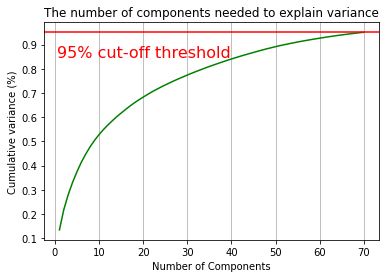

(147, 71)
egfr
(3987, 3)
(3987, 30562)
(3987, 886)


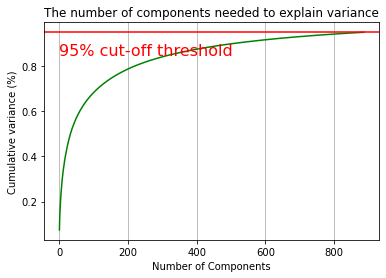

(3987, 887)
met
(2191, 3)
(2191, 30562)
(2191, 555)


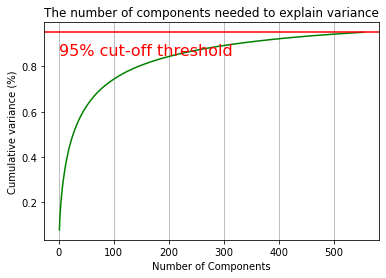

(2191, 556)
alk
(1182, 3)
(1182, 30562)
(1182, 364)


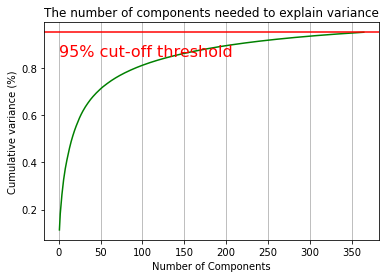

(1182, 365)
erbB2
(1543, 3)
(1543, 30562)
(1543, 387)


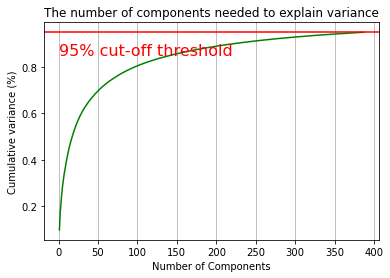

(1543, 388)
ret
(2099, 3)
(2099, 30562)
(2099, 438)


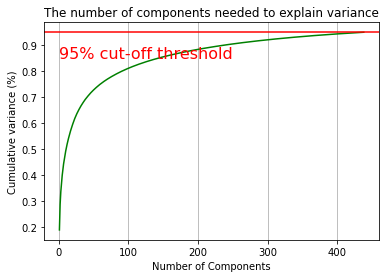

(2099, 439)
ros1
(118, 3)
(118, 30562)
(118, 48)


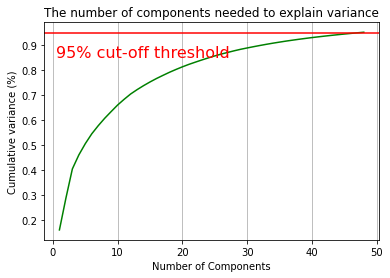

(118, 49)


In [5]:
target_list = ['erbB4', 'egfr', 'met', 'alk', 'erbB2', 'ret', 'ros1']
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'

for tar in target_list:
    print(tar)
    data_dir = st_dir+'/'+tar
    train = pd.read_csv(data_dir+'/train.csv',index_col=0)
    print(train.shape)
    dataset = pd.merge(train, fp, on=['SMILES_NS'], how='inner')
    train_fp = dataset[dataset.columns[3:]]
    print(train_fp.shape)

    # at %95 variance
    n=0.95
    pca_model = PCA(n_components=n)
    train_pca = pca_model.fit_transform(train_fp)
    print(train_pca.shape)
    
    f = plt.figure()
    plt.plot(np.arange(1, len(train_pca[0])+1 , step=1),np.cumsum(pca_model.explained_variance_ratio_),'-g',label='n_components=%d'%n)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    plt.grid(axis='x')
    plt.show()
    
    #Save trained PCA model
    pkl_filename = tar+"_PCA_train95var_model_afterAC.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(pca_model, file)
        
    save_dir = data_dir+'/PCA'
    train_pca_df = concatResult(dataset[['SMILES_NS']], train_pca)
    train_pca_df.to_csv(save_dir+'/train_PCA16FPs.csv')
    print(train_pca_df.shape)

In [6]:
target_list = ['erbB4', 'egfr', 'met', 'alk', 'erbB2', 'ret', 'ros1']
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'

for tar in target_list:
    print(tar)
    #load trained PCA model
    pkl_filename = tar+'_PCA_train95var_model_afterAC.pkl'
    with open(pkl_filename, 'rb') as file:
        trainedPCA = pickle.load(file)
    
    #load data
    data_dir = st_dir+'/'+tar
    save_dir = data_dir+'/PCA'
    
    print('Internal Test Set')
    intest = pd.read_csv(data_dir+'/internal-test.csv',index_col=0)
    inttest_all =  pd.merge(intest, fp, on=['SMILES_NS'], how='inner')
    print(inttest_all.shape)
    inttest_fp = inttest_all[inttest_all.columns[3:]]
    inttest_pca = fitPCA(inttest_fp, trainedPCA)
    inttest_pca_df = concatResult(inttest_all[['SMILES_NS']], inttest_pca)
    print(inttest_pca_df.shape)
    inttest_pca_df.to_csv(save_dir+'/internal-test_PCA16FPs.csv')
    
    print('External Test Set')
    extest = pd.read_csv(data_dir+'/external-test.csv',index_col=0)
    exttest_all =  pd.merge(extest, fp, on=['SMILES_NS'], how='inner')
    print(exttest_all.shape)
    exttest_fp = exttest_all[exttest_all.columns[3:]]
    exttest_pca = fitPCA(exttest_fp, trainedPCA)
    exttest_pca_df = concatResult(exttest_all[['SMILES_NS']], exttest_pca)
    print(exttest_pca_df.shape)
    exttest_pca_df.to_csv(save_dir+'/external-test_PCA16FPs.csv')
    print('\n')

erbB4
Internal Test Set
(16, 30565)
(16, 30562)
(16, 70)
(16, 71)
External Test Set
(19, 30565)
(19, 30562)
(19, 70)
(19, 71)


egfr
Internal Test Set
(439, 30565)
(439, 30562)
(439, 886)
(439, 887)
External Test Set
(746, 30565)
(746, 30562)
(746, 886)
(746, 887)


met
Internal Test Set
(239, 30565)
(239, 30562)
(239, 555)
(239, 556)
External Test Set
(357, 30565)
(357, 30562)
(357, 555)
(357, 556)


alk
Internal Test Set
(131, 30565)
(131, 30562)
(131, 364)
(131, 365)
External Test Set
(188, 30565)
(188, 30562)
(188, 364)
(188, 365)


erbB2
Internal Test Set
(174, 30565)
(174, 30562)
(174, 387)
(174, 388)
External Test Set
(231, 30565)
(231, 30562)
(231, 387)
(231, 388)


ret
Internal Test Set
(233, 30565)
(233, 30562)
(233, 438)
(233, 439)
External Test Set
(299, 30565)
(299, 30562)
(299, 438)
(299, 439)


ros1
Internal Test Set
(13, 30565)
(13, 30562)
(13, 48)
(13, 49)
External Test Set
(15, 30565)
(15, 30562)
(15, 48)
(15, 49)




In [6]:
import deepchem as dc
import torch
from torch_geometric.data import Data

def torchData(data):
    X =  Data(x=torch.tensor(data.node_features, dtype=torch.float),
              edge_index=torch.tensor(data.edge_index, dtype=torch.long),
              edge_attr=torch.tensor(data.edge_features,dtype=torch.float)
             )
    return X

def loadData(df, index):
    featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
    out = featurizer.featurize(df.SMILES_NS)
    X = [torchData(out[i]) for i in index]
    fingerprint = [df.iloc[i, 3:].values.astype(np.float).tolist() for i in index]
    for ind, data in enumerate(X):
        y = df.pIC50[index[ind]]
        fing = fingerprint[ind]
        data.y = torch.tensor([[y]])
        data.fing = torch.tensor([fing])
    demo = df.iloc[index,:3]
    demo = demo.reset_index(drop=True)
    print('Number of Dataset: '+str(demo.shape[0]))
    return X, demo

def count_taskDataset(df, target_list):
    tk_df = pd.DataFrame()
    result = pd.DataFrame(index=[0], columns=target_list)
    result['total'] = df.shape[0]
    print('total data: '+str(df.shape[0]))
    for tar in target_list:
        tar_df = df.dropna(subset=['pIC50_'+tar])
        tar_df = tar_df[['SMILES_NS','pIC50_'+tar]]
        tar_df.rename(columns={'pIC50_'+tar:'pIC50'},inplace=True)
        tar_df['target'] = tar
        tk_df = pd.concat([tk_df, tar_df],axis=0)
        result[tar] = tar_df.shape[0]
        print(tar+' data: '+str(tar_df.shape[0]))
    tk_df.sort_index(inplace=True)
    return result, tk_df

In [16]:
target_list = ['erbB4', 'egfr', 'met', 'alk', 'erbB2', 'ret', 'ros1']
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'

for tar in target_list:
    print(tar)
    data_dir = st_dir+'/'+tar
    
    print('Train Dataset')
    train_data = pd.read_csv(data_dir+'/train.csv', index_col=0)
    train_pca = pd.read_csv(data_dir+'/PCA/train_PCA16FPs.csv', index_col=0)
    train = pd.merge(train_data, train_pca, on=['SMILES_NS'], how='inner')
    train_X, train_demo = loadData(train, train.index)
    with open(data_dir+'/X/train', 'wb') as fp:
        pickle.dump(train_X, fp)
    train_demo.to_csv(data_dir+'/dataframe/train.csv')
    print(train_demo.shape)
    
    print('External Test Dataset')
    extest_data = pd.read_csv(data_dir+'/external-test.csv', index_col=0)
    extest_pca = pd.read_csv(data_dir+'/PCA/external-test_PCA16FPs.csv', index_col=0)
    extest = pd.merge(extest_data, extest_pca, on=['SMILES_NS'], how='inner')
    extest_X, extest_demo = loadData(extest, extest.index)
    with open(data_dir+'/X/external-test', 'wb') as fp:
        pickle.dump(extest_X, fp)
    extest_demo.to_csv(data_dir+'/dataframe/external-test.csv')
    print(extest_demo.shape)

    print('Internal test set')
    intest_data = pd.read_csv(data_dir+'/internal-test.csv', index_col=0)
    intest_pca = pd.read_csv(data_dir+'/PCA/internal-test_PCA16FPs.csv', index_col=0)
    intest = pd.merge(intest_data, intest_pca, on=['SMILES_NS'], how='inner')
    intest_X, intest_demo = loadData(intest, intest.index)
    with open(data_dir+'/X/internal-test', 'wb') as fp:
        pickle.dump(intest_X, fp)
    intest_demo.to_csv(data_dir+'/dataframe/internal-test.csv')
    print(intest_demo.shape)
    print('\n')

erbB4
Train Dataset
Number of Dataset: 147
(147, 3)
External Test Dataset
Number of Dataset: 19
(19, 3)
Internal test set
Number of Dataset: 16
(16, 3)


egfr
Train Dataset
Number of Dataset: 3987
(3987, 3)
External Test Dataset
Number of Dataset: 746
(746, 3)
Internal test set
Number of Dataset: 439
(439, 3)


met
Train Dataset
Number of Dataset: 2191
(2191, 3)
External Test Dataset
Number of Dataset: 357
(357, 3)
Internal test set
Number of Dataset: 239
(239, 3)


alk
Train Dataset
Number of Dataset: 1182
(1182, 3)
External Test Dataset
Number of Dataset: 188
(188, 3)
Internal test set
Number of Dataset: 131
(131, 3)


erbB2
Train Dataset
Number of Dataset: 1543
(1543, 3)
External Test Dataset
Number of Dataset: 231
(231, 3)
Internal test set
Number of Dataset: 174
(174, 3)


ret
Train Dataset
Number of Dataset: 2099
(2099, 3)
External Test Dataset
Number of Dataset: 299
(299, 3)
Internal test set
Number of Dataset: 233
(233, 3)


ros1
Train Dataset
Number of Dataset: 118
(118, 3)
Ex

In [18]:
#5-fold Cross-validation
n_round = 5
cv = '5_cv'

mt_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/multi_task'
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'

for n in range(n_round):
    print('Dataset fold '+str(n))
    mt_T = pd.read_csv(mt_dir+'/dataframe/'+cv+'/train_kfold-'+str(n)+'.csv', index_col=0)
    _,tk_T = count_taskDataset(mt_T, target_list)
    print('Multitask Train',tk_T.shape)
    
    mt_V = pd.read_csv(mt_dir+'/dataframe/'+cv+'/valid_kfold-'+str(n)+'.csv', index_col=0)
    _,tk_V = count_taskDataset(mt_V, target_list)
    print('Multitask Valid',tk_V.shape)
    
    for tar in target_list:
        print(tar)
        data_dir = st_dir+'/'+tar
        train_pca = pd.read_csv(data_dir+'/PCA/train_PCA16FPs.csv', index_col=0)
        
        print('Train')
        cv_train = tk_T[tk_T.target == tar].reset_index(drop=True)
        cv_train_pca = pd.merge(cv_train, train_pca, on=['SMILES_NS'], how='inner')
        print(cv_train_pca.shape)
        T_X, T_demo = loadData(cv_train_pca, cv_train_pca.index)
        with open(data_dir+'/X/'+cv+'/train_kfold-'+str(n), 'wb') as fp:
            pickle.dump(T_X, fp)
        T_demo.to_csv(data_dir+'/dataframe/'+cv+'/train_kfold-'+str(n)+'.csv')
        print(T_X[0])
        print(T_demo.shape)
        
        print('Valid')
        cv_valid = tk_V[tk_V.target == tar].reset_index(drop=True)
        cv_valid_pca = pd.merge(cv_valid, train_pca, on=['SMILES_NS'], how='inner')
        print(cv_valid_pca.shape)
        valid_X, V_demo = loadData(cv_valid_pca, cv_valid_pca.index)
        with open(data_dir+'/X/'+cv+'/valid_kfold-'+str(n), 'wb') as fp:
            pickle.dump(valid_X, fp)
        V_demo.to_csv(data_dir+'/dataframe/'+cv+'/valid_kfold-'+str(n)+'.csv')
        print(valid_X[0])
        print(V_demo.shape)
        print('Dataset fold '+str(n)+' has been saved')

Dataset fold 0
total data: 8004
erbB4 data: 117
egfr data: 3180
met data: 1753
alk data: 946
erbB2 data: 1236
ret data: 1682
ros1 data: 95
Multitask Train (9009, 3)
total data: 2001
erbB4 data: 30
egfr data: 807
met data: 438
alk data: 236
erbB2 data: 307
ret data: 417
ros1 data: 23
Multitask Valid (2258, 3)
erbB4
Train
(117, 73)
Number of Dataset: 117
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 70], x=[41, 30], y=[1, 1])
(117, 3)
Valid
(30, 73)
Number of Dataset: 30
Data(edge_attr=[66, 11], edge_index=[2, 66], fing=[1, 70], x=[30, 30], y=[1, 1])
(30, 3)
Dataset fold 0 has been saved
egfr
Train
(3180, 889)
Number of Dataset: 3180
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 886], x=[41, 30], y=[1, 1])
(3180, 3)
Valid
(807, 889)
Number of Dataset: 807
Data(edge_attr=[66, 11], edge_index=[2, 66], fing=[1, 886], x=[30, 30], y=[1, 1])
(807, 3)
Dataset fold 0 has been saved
met
Train
(1753, 558)
Number of Dataset: 1753
Data(edge_attr=[80, 11], edge_index=[2, 80], fing=[1,

Number of Dataset: 437
Data(edge_attr=[76, 11], edge_index=[2, 76], fing=[1, 555], x=[34, 30], y=[1, 1])
(437, 3)
Dataset fold 3 has been saved
alk
Train
(944, 367)
Number of Dataset: 944
Data(edge_attr=[80, 11], edge_index=[2, 80], fing=[1, 364], x=[35, 30], y=[1, 1])
(944, 3)
Valid
(238, 367)
Number of Dataset: 238
Data(edge_attr=[86, 11], edge_index=[2, 86], fing=[1, 364], x=[41, 30], y=[1, 1])
(238, 3)
Dataset fold 3 has been saved
erbB2
Train
(1232, 390)
Number of Dataset: 1232
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 387], x=[41, 30], y=[1, 1])
(1232, 3)
Valid
(311, 390)
Number of Dataset: 311
Data(edge_attr=[78, 11], edge_index=[2, 78], fing=[1, 387], x=[35, 30], y=[1, 1])
(311, 3)
Dataset fold 3 has been saved
ret
Train
(1677, 441)
Number of Dataset: 1677
Data(edge_attr=[76, 11], edge_index=[2, 76], fing=[1, 438], x=[34, 30], y=[1, 1])
(1677, 3)
Valid
(422, 441)
Number of Dataset: 422
Data(edge_attr=[94, 11], edge_index=[2, 94], fing=[1, 438], x=[40, 30], y=[1, 1])

In [17]:
#10-fold Cross-validation
n_round = 10
cv = 'cv'

mt_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/multi_task'
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'

for n in range(n_round):
    print('Dataset fold '+str(n))
    mt_T = pd.read_csv(mt_dir+'/dataframe/'+cv+'/train_kfold-'+str(n)+'.csv', index_col=0)
    _,tk_T = count_taskDataset(mt_T, target_list)
    print(tk_T.shape)
    
    mt_V = pd.read_csv(mt_dir+'/dataframe/'+cv+'/valid_kfold-'+str(n)+'.csv', index_col=0)
    _,tk_V = count_taskDataset(mt_V, target_list)
    print(tk_V.shape)
    
    for tar in target_list:
        print(tar)
        data_dir = st_dir+'/'+tar
        train_pca = pd.read_csv(data_dir+'/PCA/train_PCA16FPs.csv', index_col=0)
        
        print('Train')
        cv_train = tk_T[tk_T.target == tar].reset_index(drop=True)
        cv_train_pca = pd.merge(cv_train, train_pca, on=['SMILES_NS'], how='inner')
        print(cv_train_pca.shape)
        T_X, T_demo = loadData(cv_train_pca, cv_train_pca.index)
        with open(data_dir+'/X/'+cv+'/train_kfold-'+str(n), 'wb') as fp:
            pickle.dump(T_X, fp)
        T_demo.to_csv(data_dir+'/dataframe/'+cv+'/train_kfold-'+str(n)+'.csv')
        print(T_X[0])
        print(T_demo.shape)
        
        print('Valid')
        cv_valid = tk_V[tk_V.target == tar].reset_index(drop=True)
        cv_valid_pca = pd.merge(cv_valid, train_pca, on=['SMILES_NS'], how='inner')
        print(cv_valid_pca.shape)
        valid_X, V_demo = loadData(cv_valid_pca, cv_valid_pca.index)
        with open(data_dir+'/X/'+cv+'/valid_kfold-'+str(n), 'wb') as fp:
            pickle.dump(valid_X, fp)
        V_demo.to_csv(data_dir+'/dataframe/'+cv+'/valid_kfold-'+str(n)+'.csv')
        print(valid_X[0])
        print(V_demo.shape)
        print('Dataset fold '+str(n)+' has been saved')

Dataset fold 0
total data: 9004
erbB4 data: 131
egfr data: 3580
met data: 1967
alk data: 1063
erbB2 data: 1387
ret data: 1891
ros1 data: 107
(10126, 3)
total data: 1001
erbB4 data: 16
egfr data: 407
met data: 224
alk data: 119
erbB2 data: 156
ret data: 208
ros1 data: 11
(1141, 3)
erbB4
Train
(131, 73)
Number of Dataset: 131
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 70], x=[41, 30], y=[1, 1])
(131, 3)
Valid
(16, 73)
Number of Dataset: 16
Data(edge_attr=[62, 11], edge_index=[2, 62], fing=[1, 70], x=[27, 30], y=[1, 1])
(16, 3)
Dataset fold 0 has been saved
egfr
Train
(3580, 889)
Number of Dataset: 3580
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 886], x=[41, 30], y=[1, 1])
(3580, 3)
Valid
(407, 889)
Number of Dataset: 407
Data(edge_attr=[62, 11], edge_index=[2, 62], fing=[1, 886], x=[27, 30], y=[1, 1])
(407, 3)
Dataset fold 0 has been saved
met
Train
(1967, 558)
Number of Dataset: 1967
Data(edge_attr=[80, 11], edge_index=[2, 80], fing=[1, 555], x=[35, 30], y=[1, 1])


Number of Dataset: 1064
Data(edge_attr=[80, 11], edge_index=[2, 80], fing=[1, 364], x=[35, 30], y=[1, 1])
(1064, 3)
Valid
(118, 367)
Number of Dataset: 118
Data(edge_attr=[86, 11], edge_index=[2, 86], fing=[1, 364], x=[40, 30], y=[1, 1])
(118, 3)
Dataset fold 3 has been saved
erbB2
Train
(1386, 390)
Number of Dataset: 1386
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 387], x=[41, 30], y=[1, 1])
(1386, 3)
Valid
(157, 390)
Number of Dataset: 157
Data(edge_attr=[60, 11], edge_index=[2, 60], fing=[1, 387], x=[28, 30], y=[1, 1])
(157, 3)
Dataset fold 3 has been saved
ret
Train
(1890, 441)
Number of Dataset: 1890
Data(edge_attr=[76, 11], edge_index=[2, 76], fing=[1, 438], x=[34, 30], y=[1, 1])
(1890, 3)
Valid
(209, 441)
Number of Dataset: 209
Data(edge_attr=[82, 11], edge_index=[2, 82], fing=[1, 438], x=[38, 30], y=[1, 1])
(209, 3)
Dataset fold 3 has been saved
ros1
Train
(106, 51)
Number of Dataset: 106
Data(edge_attr=[76, 11], edge_index=[2, 76], fing=[1, 48], x=[34, 30], y=[1, 1]

Number of Dataset: 133
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 70], x=[41, 30], y=[1, 1])
(133, 3)
Valid
(14, 73)
Number of Dataset: 14
Data(edge_attr=[90, 11], edge_index=[2, 90], fing=[1, 70], x=[41, 30], y=[1, 1])
(14, 3)
Dataset fold 7 has been saved
egfr
Train
(3597, 889)
Number of Dataset: 3597
Data(edge_attr=[92, 11], edge_index=[2, 92], fing=[1, 886], x=[41, 30], y=[1, 1])
(3597, 3)
Valid
(390, 889)
Number of Dataset: 390
Data(edge_attr=[90, 11], edge_index=[2, 90], fing=[1, 886], x=[41, 30], y=[1, 1])
(390, 3)
Dataset fold 7 has been saved
met
Train
(1970, 558)
Number of Dataset: 1970
Data(edge_attr=[80, 11], edge_index=[2, 80], fing=[1, 555], x=[35, 30], y=[1, 1])
(1970, 3)
Valid
(221, 558)
Number of Dataset: 221
Data(edge_attr=[82, 11], edge_index=[2, 82], fing=[1, 555], x=[36, 30], y=[1, 1])
(221, 3)
Dataset fold 7 has been saved
alk
Train
(1063, 367)
Number of Dataset: 1063
Data(edge_attr=[80, 11], edge_index=[2, 80], fing=[1, 364], x=[35, 30], y=[1, 1])
(106

In [15]:
#10-fold Cross-validation
n_round = 10
cv = 'cv'

mt_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/multi_task'
st_dir = '/share/galaxy/fahsai/NSCLC/datasets/merge_datasets/ChEMBL+BindingDB/after_AC_removal/single_task'

for n in range(n_round):
    print('Dataset fold '+str(n))
    mt_T = pd.read_csv(mt_dir+'/dataframe/'+cv+'/train_kfold-'+str(n)+'.csv', index_col=0)
    _,tk_T = count_taskDataset(mt_T, target_list)
    print(tk_T.shape)
    
    mt_V = pd.read_csv(mt_dir+'/dataframe/'+cv+'/valid_kfold-'+str(n)+'.csv', index_col=0)
    _,tk_V = count_taskDataset(mt_V, target_list)
    print(tk_V.shape)
    
    for tar in target_list:
        print(tar)
        data_dir = st_dir+'/'+tar
        train_pca = pd.read_csv(data_dir+'/PCA/train_PCA16FPs.csv', index_col=0)
        
        print('Train')
        cv_train = tk_T[tk_T.target == tar].reset_index(drop=True)
        print(cv_train.shape)
        cv_train_pca = pd.merge(cv_train[['SMILES_NS']], train_pca, on=['SMILES_NS'], how='inner')
        print(cv_train_pca.shape)
        cv_train_pca.to_csv(data_dir+'/PCA/'+cv+'/train_kfold-'+str(n)+'.csv')
        
        print('Valid')
        cv_valid = tk_V[tk_V.target == tar].reset_index(drop=True)
        print(cv_valid.shape)
        cv_valid_pca = pd.merge(cv_valid[['SMILES_NS']], train_pca, on=['SMILES_NS'], how='inner')
        print(cv_valid_pca.shape)
        cv_valid_pca.to_csv(data_dir+'/PCA/'+cv+'/valid_kfold-'+str(n)+'.csv')
        print('Dataset fold '+str(n)+' has been saved')

Dataset fold 0
total data: 9004
erbB4 data: 131
egfr data: 3580
met data: 1967
alk data: 1063
erbB2 data: 1387
ret data: 1891
ros1 data: 107
(10126, 3)
total data: 1001
erbB4 data: 16
egfr data: 407
met data: 224
alk data: 119
erbB2 data: 156
ret data: 208
ros1 data: 11
(1141, 3)
erbB4
Train
(131, 3)
(131, 71)
Valid
(16, 3)
(16, 71)
Dataset fold 0 has been saved
egfr
Train
(3580, 3)
(3580, 887)
Valid
(407, 3)
(407, 887)
Dataset fold 0 has been saved
met
Train
(1967, 3)
(1967, 556)
Valid
(224, 3)
(224, 556)
Dataset fold 0 has been saved
alk
Train
(1063, 3)
(1063, 365)
Valid
(119, 3)
(119, 365)
Dataset fold 0 has been saved
erbB2
Train
(1387, 3)
(1387, 388)
Valid
(156, 3)
(156, 388)
Dataset fold 0 has been saved
ret
Train
(1891, 3)
(1891, 439)
Valid
(208, 3)
(208, 439)
Dataset fold 0 has been saved
ros1
Train
(107, 3)
(107, 49)
Valid
(11, 3)
(11, 49)
Dataset fold 0 has been saved
Dataset fold 1
total data: 9004
erbB4 data: 132
egfr data: 3586
met data: 1976
alk data: 1065
erbB2 data: 139

Dataset fold 9 has been saved
egfr
Train
(3592, 3)
(3592, 887)
Valid
(395, 3)
(395, 887)
Dataset fold 9 has been saved
met
Train
(1973, 3)
(1973, 556)
Valid
(218, 3)
(218, 556)
Dataset fold 9 has been saved
alk
Train
(1065, 3)
(1065, 365)
Valid
(117, 3)
(117, 365)
Dataset fold 9 has been saved
erbB2
Train
(1388, 3)
(1388, 388)
Valid
(155, 3)
(155, 388)
Dataset fold 9 has been saved
ret
Train
(1888, 3)
(1888, 439)
Valid
(211, 3)
(211, 439)
Dataset fold 9 has been saved
ros1
Train
(106, 3)
(106, 49)
Valid
(12, 3)
(12, 49)
Dataset fold 9 has been saved
